<a href="https://colab.research.google.com/github/Eliezerguimaraes/ml_car_prices/blob/main/Minera%C3%A7%C3%A3o_de_Dados_CARPRICES_17_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Eliezerguimaraes/ml_car_prices/main/car-prices.csv'

dados = pd.read_csv(url)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
mapa = {
    "mileage_per_year" : "milhas_por_ano",
    "model_year" : "ano_do_modelo",
    "price" : "preco",
    "sold" : "vendido"
}
dados = dados.rename(columns = mapa)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
dados = dados.rename(columns = mapa)
a = {
    'no': 0,
    'yes': 1
}
dados.vendido = dados.vendido.map(a)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [4]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [5]:
# prompt: converter de milhas para km

dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()


,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806
3,3,26823,2015,95276.14,0,9,43167.32682
4,4,7935,2014,117384.68,1,10,12770.11290


In [6]:
dados.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], inplace = True)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


##Balanceamento

In [7]:
dados.vendido.value_counts()

vendido
1    5800
0    4200
Name: count, dtype: int64

In [10]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



Treinaremos com 7500 elementos e testaremos com 2500 elementos


##MEU CLASSIFICADOR


##LINEAR SVC

In [13]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = dados[['km_por_ano', 'idade_do_modelo', 'preco']]
y = dados['vendido']

seed = 20
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=seed, test_size = 0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x), len (teste_x)))

modelo = LinearSVC() #Cria modelo
modelo.fit(treino_x, treino_y) #Treina
previsoes = modelo.predict(teste_x) #Teste

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" %acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acuracia foi 58.00%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##DUMMY

In [12]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier() #cria modelo
dummy_stratified.fit(treino_x, treino_y) #treina modelo
acuracia = dummy_stratified.score(teste_x, teste_y) * 100 #teste

print("A acuracia do dummy stratified foi %.2f%%" %acuracia)

A acuracia do dummy stratified foi 58.00%


##SVC

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = dados[['km_por_ano', 'idade_do_modelo', 'preco']]
y = dados['vendido']

seed = 20
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state=seed, test_size = 0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(raw_treino_x), len (raw_teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x) #criando normalizador treinando com raw_treino_x
treino_x = scaler.transform(raw_treino_x) #treino normalizado
teste_x = scaler.transform(raw_teste_x) #teste normalizado

modelo = SVC(gamma = "auto", random_state = seed) #Cria modelo
modelo.fit(treino_x, treino_y) #Treina
previsoes = modelo.predict(teste_x) #Teste

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" %acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acuracia foi 75.92%


##DUMMY

In [15]:
dummy_stratified = DummyClassifier() #cria modelo
dummy_stratified.fit(treino_x, treino_y) #treina modelo
acuracia = dummy_stratified.score(teste_x, teste_y) * 100 #teste
print("A acuracia do dummy stratified foi %.2f%%" %acuracia)

A acuracia do dummy stratified foi 58.00%


## DECISION TREE

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = dados[['km_por_ano', 'idade_do_modelo', 'preco']]
y = dados['vendido']

seed = 20
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=seed, test_size = 0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x), len (teste_x)))

#Arvore de decisao não sao afetados pela escala
modelo = DecisionTreeClassifier(max_depth=3, random_state=seed) #Cria modelo
modelo.fit(treino_x, treino_y) #Treina
previsoes = modelo.predict(teste_x) #Teste

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" %acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acuracia foi 78.40%


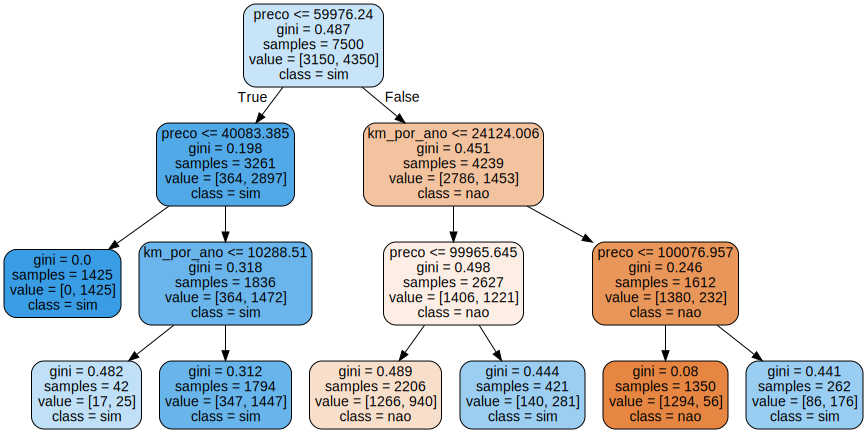

In [22]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file = None, filled = True, rounded = True, feature_names = features, class_names=["nao", "sim"])
grafico = graphviz.Source(dot_data)
grafico

In [25]:
carro = [70000, 3, 20000]
modelo.predict([carro])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])